### 1. 컨투어

컨투어 = 등고선, 영상에서는 같은 색상이나 밝기의 연속된 점을 찾아 잇는 곡선을 차아내면 모양 분석과 객체 인식에 사용할 수 있다. 컨투어 함수는 다음과 같다.

- **contour, hierarchy = cv2.findCountours(src, mode, method[, contours, hierarchy, offset])[-2:]**
- **cv2.drawContours(img, contours, contourIdx, color, thickness)**

contour의 도형의 갯수: 1
contour3의 도형의 갯수: 1


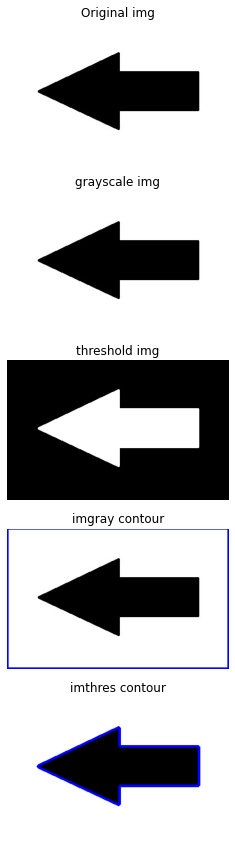

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/arrow.jpg')
original = img.copy()
img3 = img.copy()

# 그레이 스케일로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 스레시홀드로 바이너리 이미지로 만들어서 검은배경에 흰색전경으로 반전
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥쪽 컨투어에 대해 모든 좌표 반환
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                 cv2.CHAIN_APPROX_NONE)

# 가장 바깥쪽 컨투어에 대해 모든 좌표 반환
contour3, hierarchy = cv2.findContours(imgray, cv2.RETR_EXTERNAL, \
                                                 cv2.CHAIN_APPROX_NONE)

# 각각의 컨투의 갯수 출력
print('contour의 도형의 갯수: %d'% (len(contour)))
print('contour3의 도형의 갯수: %d'% (len(contour3)))

# 모든 좌표를 갖는 컨투어 그리기, 초록색 
cv2.drawContours(img, contour, -1, (0,255,0), 4)
# 꼭지점 좌표만을 갖는 컨투어 그리기, 초록색 
cv2.drawContours(img3, contour3, -1, (0,255,0), 4)

# 컨투어 모든 좌표를 작은 파랑색 점(원)으로 표시 
for i in contour:
    for j in i:
        cv2.circle(img, tuple(j[0]), 2, (255,0,0), -1) 

for i in contour3:
    for j in i:
        cv2.circle(img3, tuple(j[0]), 2, (255,0,0), -1) 

imthres = cv2.cvtColor(imthres, cv2.COLOR_BGR2RGB)
imgray = cv2.cvtColor(imgray, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# 결과 출력
fig = plt.figure(figsize=(10, 15))
plt.subplot(511), plt.axis('off'), plt.imshow(original), plt.title("Original img")
plt.subplot(512), plt.axis('off'), plt.imshow(imgray), plt.title("grayscale img")
plt.subplot(513), plt.axis('off'), plt.imshow(imthres), plt.title("threshold img")
plt.subplot(514), plt.axis('off'), plt.imshow(img3), plt.title("imgray contour")
plt.subplot(515), plt.axis('off'), plt.imshow(img), plt.title("imthres contour")
plt.show()

흰색 부분의 바깥쪽을 탐지하여 컨투어를 하는 것을 확인하였다. 

contour의 도형의 갯수: 1 
contour2의 도형의 갯수: 1
contour3의 도형의 갯수: 1 
contour4의 도형의 갯수: 1


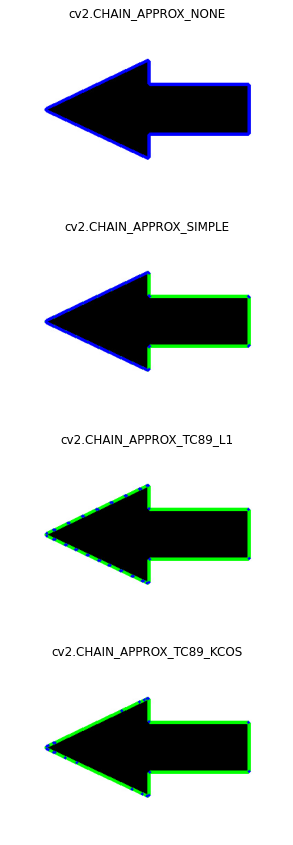

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/arrow.jpg')
img2 = img.copy()
img3 = img.copy()
img4 = img.copy()
original = img.copy()

# 그레이 스케일로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 스레시홀드로 바이너리 이미지로 만들어서 검은배경에 흰색전경으로 반전
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                 cv2.CHAIN_APPROX_NONE)

contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_SIMPLE)

contour3, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                 cv2.CHAIN_APPROX_TC89_L1)

contour4, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_TC89_KCOS)

# 각각의 컨투의 갯수 출력
print('contour의 도형의 갯수: %d \ncontour2의 도형의 갯수: %d'% (len(contour), len(contour2)))
print('contour3의 도형의 갯수: %d \ncontour4의 도형의 갯수: %d'% (len(contour3), len(contour4)))

cv2.drawContours(img, contour, -1, (0,255,0), 4)
cv2.drawContours(img2, contour2, -1, (0,255,0), 4)
cv2.drawContours(img3, contour2, -1, (0,255,0), 4)
cv2.drawContours(img4, contour2, -1, (0,255,0), 4)

# 컨투어 모든 좌표를 작은 파랑색 점(원)으로 표시 
for i in contour:
    for j in i:
        cv2.circle(img, tuple(j[0]), 2, (255,0,0), -1) 

for i in contour2:
    for j in i:
        cv2.circle(img2, tuple(j[0]), 2, (255,0,0), -1) 

for i in contour3:
    for j in i:
        cv2.circle(img3, tuple(j[0]), 2, (255,0,0), -1) 

for i in contour4:
    for j in i:
        cv2.circle(img4, tuple(j[0]), 2, (255,0,0), -1) 

imthres = cv2.cvtColor(imthres, cv2.COLOR_BGR2RGB)
imgray = cv2.cvtColor(imgray, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)


# 결과 출력
fig = plt.figure(figsize=(10, 15))
plt.subplot(411), plt.axis('off'), plt.imshow(img), plt.title("cv2.CHAIN_APPROX_NONE")
plt.subplot(412), plt.axis('off'), plt.imshow(img2), plt.title("cv2.CHAIN_APPROX_SIMPLE")
plt.subplot(413), plt.axis('off'), plt.imshow(img3), plt.title("cv2.CHAIN_APPROX_TC89_L1")
plt.subplot(414), plt.axis('off'), plt.imshow(img4), plt.title("cv2.CHAIN_APPROX_TC89_KCOS")
plt.show()


metjod type이 None이 아닌 것에 대하여 대부분 초록색 선이 나왔다.

#### 컨투어 계층 트리

contour1 개수 : 3
hierarchy :
 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]
contour2 개수 : 6
hierarchy :
 [[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [-1  2  5 -1]
  [-1 -1 -1  4]]]


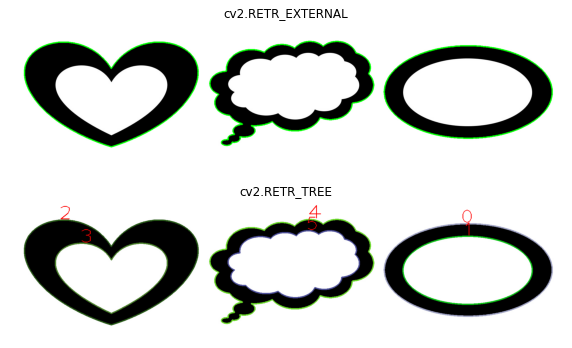

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 영상 읽기
img = cv2.imread('./img/shape_donut.jpg')
img2 = img.copy()
# 바이너리 이미지로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥 컨투어만 수집
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_NONE)
# 컨투어 갯수와 계층 트리 출력
print("contour1 개수 :", len(contour))
print("hierarchy :\n", hierarchy)

# 모든 컨투어를 트리 계층 으로 수집
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, \
                                            cv2.CHAIN_APPROX_SIMPLE)
# 컨투어 갯수와 계층 트리 출력
print("contour2 개수 :", len(contour2))
print("hierarchy :\n", hierarchy)

# 가장 바깥 컨투어만 그리기
cv2.drawContours(img, contour, -1, (0,255,0), 3)
# 모든 컨투어 그리기
for idx, cont in enumerate(contour2): 
    # 랜덤한 컬러 추출 
    color = [int(i) for i in np.random.randint(0,255, 3)]
    # 컨투어 인덱스 마다 랜덤한 색상으로 그리기 
    cv2.drawContours(img2, contour2, idx, color, 3)
    # 컨투어 첫 좌표에 인덱스 숫자 표시
    cv2.putText(img2, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_PLAIN, \
                                                            5, (0,0,255), 2)

# 화면 출력
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# 결과 출력
fig = plt.figure(figsize=(10, 6))
plt.subplot(211), plt.axis('off'), plt.imshow(img), plt.title("cv2.RETR_EXTERNAL")
plt.subplot(212), plt.axis('off'), plt.imshow(img2), plt.title("cv2.RETR_TREE")
plt.show()

컨투어를 활용하여 테두리를 인식할 수 있다.

#### 이미지 모멘트와 컨투어 속성

모멘트 = 힘의 양을 기술할 때 사용하는 용어, 영상에서도 대상 물체의 양적인 속성을 표현할 때 모멘트라는 용어를 사용

- **moment = cv2.moments(contour)**
- **retval = cv2.contourArea(contour[, oriented=False])**
- **retval = cv2.arcLength(curve, closed)**

area:159637.00
area:169739.00
area:147855.00


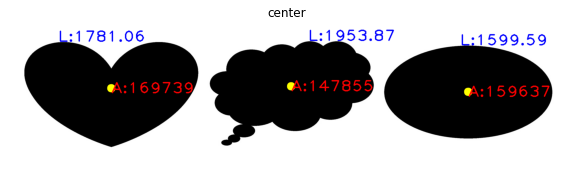

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("./img/shape.jpg")
# 그레이 스케일 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 바이너리 스케일 변환
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)
# 컨투어 찾기
contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                            cv2.CHAIN_APPROX_SIMPLE)

# 각 도형의 컨투어에 대한 루프
for c in contours:
    # 모멘트 계산
    mmt = cv2.moments(c)
    # m10/m00, m01/m00  중심점 계산
    cx = int(mmt['m10']/mmt['m00'])
    cy = int(mmt['m01']/mmt['m00'])
    # 영역 넓이
    a = mmt['m00']
    # 영역 외곽선 길이
    l = cv2.arcLength(c, True)
    # 중심점에 노란색 점 그리기
    cv2.circle(img, (cx, cy), 15, (0, 255, 255), -1)
    # 중심점 근처에 넓이 그리기
    cv2.putText(img, "A:%.0f"%a, (cx, cy+20) , cv2.FONT_HERSHEY_PLAIN, \
                                                            4, (0,0,255), 3)
    # 컨투어 시작점에 길이 그리기
    cv2.putText(img, "L:%.2f"%l, tuple(c[0][0]), cv2.FONT_HERSHEY_PLAIN, \
                                                            4, (255,0,0), 3)
    # 함수로 컨투어 넓이 계산해서 출력
    print("area:%.2f"%cv2.contourArea(c, False))

# 화면 출력
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 결과 출력
fig = plt.figure(figsize=(10, 6))
plt.subplot(211), plt.axis('off'), plt.imshow(img), plt.title("center")
plt.show()

#### 컨투어를 감싸는 도형 그리기

- **x,y,w,h = cv2.boundingRect(contour)**
- **rotateRext = cv2.minAreaRect(contour)**
- **vertex = cv2.boxPoints(rotateRect)**
- **center, radius = cv2.minEnclosingCircle(contour)**
- **area, triangle = cv2.minEnclosingTriangle(points)**
- **ellipse = cv2.fitEllipse(points)**
- **line = cv2.fitLine(points, distType, param, reps, aeps[, line])**

(273, 273, 3)


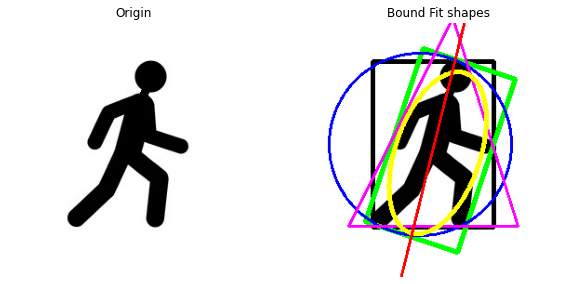

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽어서 그레이스케일 변환, 바이너리 스케일 변환
img = cv2.imread("./img/human.jpg")
print(img.shape)
origin = img.copy()
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127,255,cv2.THRESH_BINARY_INV)

# 컨투어 찾기
contours, hr = cv2.findContours(th, cv2.RETR_LIST, \
                                        cv2.CHAIN_APPROX_SIMPLE)
contr = contours[0]

# 감싸는 사각형 표시(검정색)
x,y,w,h = cv2.boundingRect(contr)
cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,0), 3)

# 최소한의 사각형 표시(초록색)
rect = cv2.minAreaRect(contr)
box = cv2.boxPoints(rect)   # 중심점과 각도를 4개의 꼭지점 좌표로 변환
box = np.int0(box)          # 정수로 변환
cv2.drawContours(img, [box], -1, (0,255,0), 3)

# 최소한의 원 표시(파랑색)
(x,y), radius = cv2.minEnclosingCircle(contr)
cv2.circle(img, (int(x), int(y)), int(radius), (255,0,0), 2)

# 최소한의 삼각형 표시(분홍색)
ret, tri = cv2.minEnclosingTriangle(contr)
cv2.polylines(img, [np.int32(tri)], True, (255,0,255), 2)

# 최소한의 타원 표시(노랑색)
ellipse = cv2.fitEllipse(contr)
cv2.ellipse(img, ellipse, (0,255,255), 3)

# 중심점 통과하는 직선 표시(빨강색)
[vx,vy,x,y] = cv2.fitLine(contr, cv2.DIST_L2,0,0.01,0.01)
cols,rows = img.shape[:2]
# 버전이 바뀌어서 int 무조건 붙여줘야 함
cv2.line(img,(0, int(0-x*(vy/vx) + y)), (int(cols-1), int((cols-x)*(vy/vx) + y)),(0,0,255),2)

# 컬러맵 변경
origin = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 결과 출력
fig = plt.figure(figsize=(10, 6))
plt.subplot(121), plt.axis('off'), plt.imshow(origin), plt.title("Origin")
plt.subplot(122), plt.axis('off'), plt.imshow(img), plt.title("Bound Fit shapes")
plt.show()

노란색 타원은 직사각형의 타원이기 때문에 사람을 다 감싸지 못하는 것을 확인할 수 있다.

### 컨투어 단순화

컨투어를 단순하게 한 거. 오차범위 내 근사 값으로 컨투어를 계산하는 함수를 제공.

- **approx = cv2.approxPolyDP(contour, epsilon, closed)**

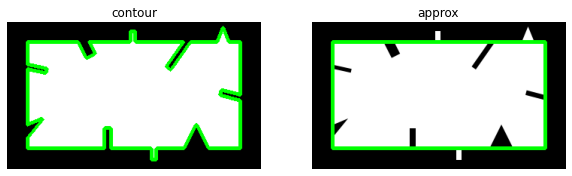

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/bad_rect.png')
img2 = img.copy()

# 그레이스케일과 바이너리 스케일 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)

# 컨투어 찾기 
contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                     cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]
# 전체 둘레의 0.05로 오차 범위 지정 
epsilon = 0.05 * cv2.arcLength(contour, True)
# 근사 컨투어 계산 
approx = cv2.approxPolyDP(contour, epsilon, True)

# 각각 컨투어 선 그리기
cv2.drawContours(img, [contour], -1, (0,255,0), 3)
cv2.drawContours(img2, [approx], -1, (0,255,0), 3)

# 컬러맵 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# 결과 출력
fig = plt.figure(figsize=(10, 6))
plt.subplot(121), plt.axis('off'), plt.imshow(img), plt.title("contour")
plt.subplot(122), plt.axis('off'), plt.imshow(img2), plt.title("approx")
plt.show()

뚜렷하게 컨투어를 하는 것이 아니라 근사하게 컨투어를 하는 것을 확인할 수 있다.

#### 컨투어와 도형 매칭

서로 다른 물체의 컨투어를 비교하면 두 물체가 얼마나 비슷한 모양인지를 알아낼 수 있다.
- **retval = cv2.matchShapes(contour1, contour2, method, parameter)**

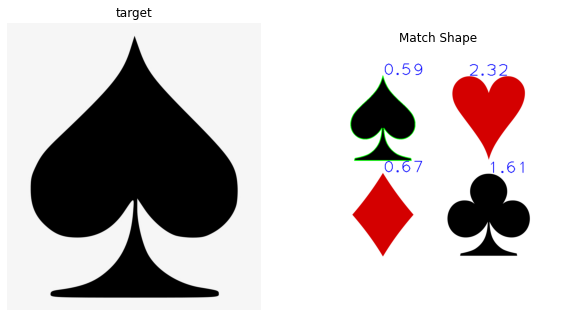

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 매칭을 위한 이미지 읽기
target = cv2.imread('./img/spade.png') # 매칭 대상
shapes = cv2.imread('./img/trump_card.png') # 여러 도형
# 그레이 스케일 변환
targetGray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
shapesGray = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)
# 바이너리 스케일 변환
ret, targetTh = cv2.threshold(targetGray, 127, 255, cv2.THRESH_BINARY_INV)
ret, shapesTh = cv2.threshold(shapesGray, 127, 255, cv2.THRESH_BINARY_INV)
# 컨투어 찾기
cntrs_target, _ = cv2.findContours(targetTh, cv2.RETR_EXTERNAL, \
                                            cv2.CHAIN_APPROX_SIMPLE)
cntrs_shapes, _ = cv2.findContours(shapesTh, cv2.RETR_EXTERNAL, \
                                            cv2.CHAIN_APPROX_SIMPLE)

# 각 도형과 매칭을 위한 반복문
matchs = [] # 컨투어와 매칭 점수를 보관할 리스트
for contr in cntrs_shapes:
    # 대상 도형과 여러 도형 중 하나와 매칭 실행 
    match = cv2.matchShapes(cntrs_target[0], contr, cv2.CONTOURS_MATCH_I2, 0.0)
    # 해당 도형의 매칭 점수와 컨투어를 쌍으로 저장 
    matchs.append( (match, contr) )
    # 해당 도형의 컨투어 시작지점에 매칭 점수 표시 
    cv2.putText(shapes, '%.2f'%match, tuple(contr[0][0]),\
                    cv2.FONT_HERSHEY_PLAIN, 7,(255,0,0),3 )
# 매칭 점수로 정렬 
matchs.sort(key=lambda x : x[0])
# 가장 적은 매칭 점수를 얻는 도형의 컨투어에 선 그리기 
cv2.drawContours(shapes, [matchs[0][1]], -1, (0,255,0), 3)

# 컬러맵 변환
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
shapes = cv2.cvtColor(shapes, cv2.COLOR_BGR2RGB)

# 결과 출력
fig = plt.figure(figsize=(10, 6))
plt.subplot(121), plt.axis('off'), plt.imshow(target), plt.title("target")
plt.subplot(122), plt.axis('off'), plt.imshow(shapes), plt.title("Match Shape")
plt.show()


유사도 판별이 가능하다.

### 2. 허프 변환

허프 변환은 영상에서 직선과 원 같은 간단한 모양을 식별한다.

#### 허프 선 변환

수 많은 픽셀 중에서 직선 관계를 갖는 픽셀만 골라내는 것이다.
- **lines = cv2.HoughLines(img, rho, theta, threshold[, lines, srn=0, stn=0, min_theta, max_theta])**

In [35]:
print(cv2.__version__)

4.5.2


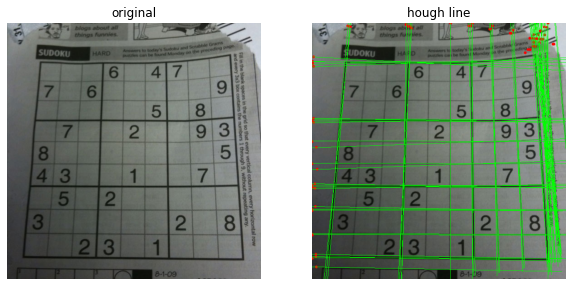

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/sudoku.png')
img2 = img.copy()
h, w = img.shape[:2]
# 그레이 스케일 변환 및 엣지 검출 
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 100, 200 )
# 허프 선 검출 ---②
lines = cv2.HoughLines(edges, 1, np.pi/180, 130)
for line in lines: # 검출된 모든 선 순회
    r,theta = line[0] # 거리와 각도wh
    tx, ty = np.cos(theta), np.sin(theta) # x, y축에 대한 삼각비
    x0, y0 = tx*r, ty*r  #x, y 기준(절편) 좌표
    # 기준 좌표에 빨강색 점 그리기
    cv2.circle(img2, (int(abs(x0)), int(abs(y0))), 3, (0,0,255), -1)
    # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
    x1, y1 = int(x0 + w*(-ty)), int(y0 + h * tx)
    x2, y2 = int(x0 - w*(-ty)), int(y0 - h * tx)
    # 선그리기
    cv2.line(img2, (x1, y1), (x2, y2), (0,255,0), 1)


# 컬러맵 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# 결과 출력
fig = plt.figure(figsize=(10, 6))
plt.subplot(121), plt.axis('off'), plt.imshow(img), plt.title("original")
plt.subplot(122), plt.axis('off'), plt.imshow(img2), plt.title("hough line")
plt.show()

#### 확률적 허프 선 변환

모두 검출하는 것은 너무 연산이 많이 필요하다. 이를 개선한 것이 확률적 허프 선 변환이다.
- **lines = cv2.HoughLinesP(img, rho, theta, threshold[, lines, minLineLength, maxLineGap])**

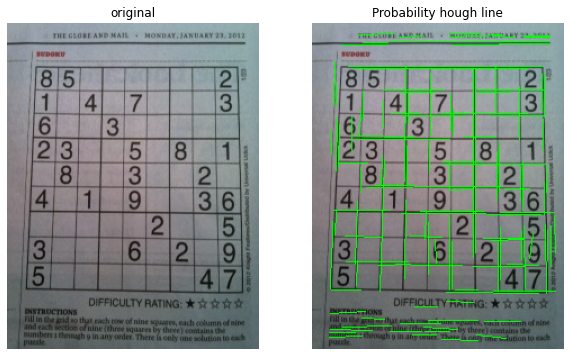

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/sudoku.jpg')
img2 = img.copy()
# 그레이 스케일로 변환 및 엣지 검출
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 50, 200 )

# 확율 허프 변환 적용
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, None, 20, 2)
for line in lines:
    # 검출된 선 그리기
    x1, y1, x2, y2 = line[0]
    cv2.line(img2, (x1,y1), (x2, y2), (0,255,0), 1)

# 컬러맵 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# 결과 출력
fig = plt.figure(figsize=(10, 6))
plt.subplot(121), plt.axis('off'), plt.imshow(img), plt.title("original")
plt.subplot(122), plt.axis('off'), plt.imshow(img2), plt.title("Probability hough line")
plt.show()

#### 허프 원 변환

다른 원 변환처럼 얘도 원 변환을 하려면 좌표계를 바꿔야한다.
- **circles = cv2.HoughCircles(img, method, dp, minDist[, circles, param1, param2, minRadius, maxRadius])**

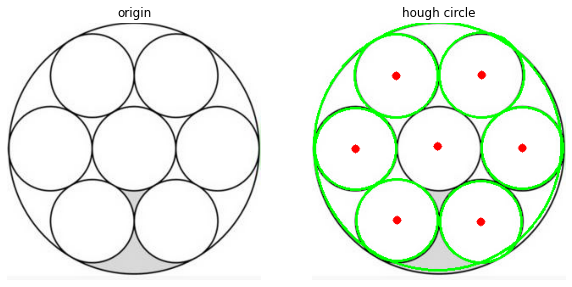

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/circles.png')
origin = img.copy()
# 그레이 스케일 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 노이즈 제거를 위한 가우시안 블러
blur = cv2.GaussianBlur(gray, (3,3), 0)
# 허프 원 변환 적용( dp=1.5, minDist=30, cany_max=200 )
# circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.5, 30, None, 200)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 40)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # 원 둘레에 초록색 원 그리기
        cv2.circle(img,(i[0], i[1]), i[2], (0, 255, 0), 2)
        # 원 중심점에 빨강색 원 그리기
        cv2.circle(img, (i[0], i[1]), 2, (0,0,255), 5)

# 컬러맵 변환
origin = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 결과 출력
fig = plt.figure(figsize=(10, 6))
plt.subplot(121), plt.axis('off'), plt.imshow(origin), plt.title("origin")
plt.subplot(122), plt.axis('off'), plt.imshow(img), plt.title("hough circle")
plt.show()
    

가운데 원은 큰 원과 같은 중심점을 가지고 있어서 컨투어로 추출이 안된 것을 확인할 수 있다.

# 발표 분량

이 전까지는 외곽 경계를 이용하여 객체 영역을 분할하는 방법에 대하여 알아보았습니다. 하지만 실제 이미지에는 노이즈도 많고 경계선도 뚜렷하지 않아 객체를 정확하게 분할하기 힘든 경우도 있습니다. 연속된 영역을 찾아 분할하는 방법도 필요하기 때문에 다음 장에서는 **'연속 영역 분할'**에 관한 내용으로 알아보겠습니다.

### 3. 연속 영역 분할

#### 3.1 거리 변환

이미지에서 객체 영역을 정확하게 파악하기 위해 객체 영역의 뼈대를 찾아야 합니다. 뼈대를 검출하는 방법 중 하나로 외곽 경계로부터 가장 멀리 떨어진 곳을 찾는 방법인 **거리 변환**을 이야기 할 수 있습니다. 

- **거리 변환** : 바이너리 스케일 이미지를 대상으로 원본 이미지와 같은 크기의 배열에 픽셀값이 0인 위치에 0으로 시작해서 멀어질 때마다 1씩 증가하는 방식으로 경계로부터 가장 먼 픽셀이 가장 큰 값을 갖게 하는 변환.

- **cv2.distanceTransform(src, distanceType, maskSize)**
    - src: 입력 영상, 바이너리 스케일
    - distanceType: 거리 계산 방식 
        - cv2.DIST_L2 
        - cv2.DIST_L1 
        - cv2.DIST_L12
        - cv2.DIST_FAIR
        - cv2.DIST_WELSCH
        - cv2.DIST_HUBER
    - maskSize: 거리 변환 커널 크기

***1) 교재 예시***

(378, 267)


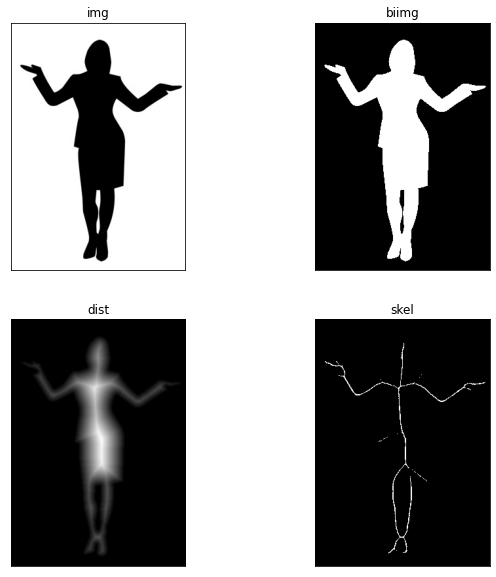

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지를 읽어서 바이너리 스케일로 변환
img = cv2.imread('../img/full_body.jpg', cv2.IMREAD_GRAYSCALE)
_, biimg = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# 거리 변환 함수를 이용하여 거리 변환
dst = cv2.distanceTransform(biimg, cv2.DIST_L2, 5)
# 거리를 0 ~ 255로 정규화
dst = (dst/(dst.max()-dst.min()) * 255).astype(np.uint8)
# 거리 값에 쓰레시홀드로 완전한 뼈대 찾기
skeleton = cv2.adaptiveThreshold(dst, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                                 cv2.THRESH_BINARY, 7, -3)
print(skeleton.shape)
# 결과 출력
# cv2.imshow('origin', img)
# cv2.imshow('dist', dst)
# cv2.imshow('skel', skeleton)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
biimg = cv2.cvtColor(biimg, cv2.COLOR_GRAY2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB)
skeleton = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2RGB)

plt.figure(figsize = (10,10))
imgs = {'img':img, 'biimg':biimg, 'dist':dst, 'skel':skeleton}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v[:,::-1])
    plt.xticks([]),plt.yticks([])

***2) 예시 이미지***

(614, 1024)


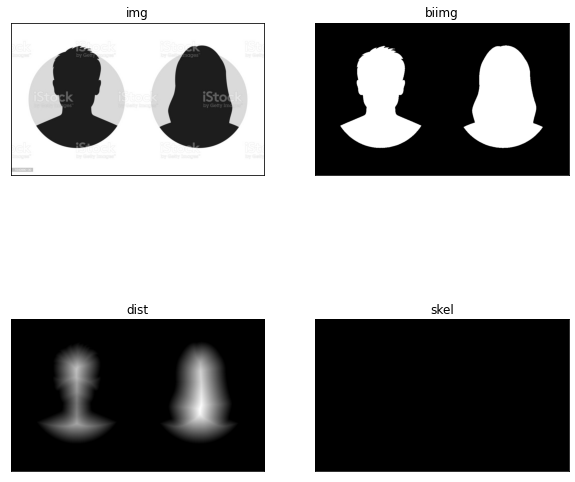

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지를 읽어서 바이너리 스케일로 변환
img = cv2.imread('./img/manwoman.jpg', cv2.IMREAD_GRAYSCALE)
_, biimg = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# 거리 변환 함수를 이용하여 거리 변환
dst = cv2.distanceTransform(biimg, cv2.DIST_L2, 5)
# 거리를 0 ~ 255로 정규화
dst = (dst/(dst.max()-dst.min()) * 255).astype(np.uint8)
# 거리 값에 쓰레시홀드로 완전한 뼈대 찾기
skeleton = cv2.adaptiveThreshold(dst, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                                 cv2.THRESH_BINARY, 7, -3)
print(skeleton.shape)
# 결과 출력
# cv2.imshow('origin', img)
# cv2.imshow('dist', dst)
# cv2.imshow('skel', skeleton)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
biimg = cv2.cvtColor(biimg, cv2.COLOR_GRAY2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB)
skeleton = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2RGB)

plt.figure(figsize = (10,10))
imgs = {'img':img, 'biimg':biimg, 'dist':dst, 'skel':skeleton}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v)
    plt.xticks([]),plt.yticks([])

***3) 예시 이미지2***

(261, 411)
(261, 411)


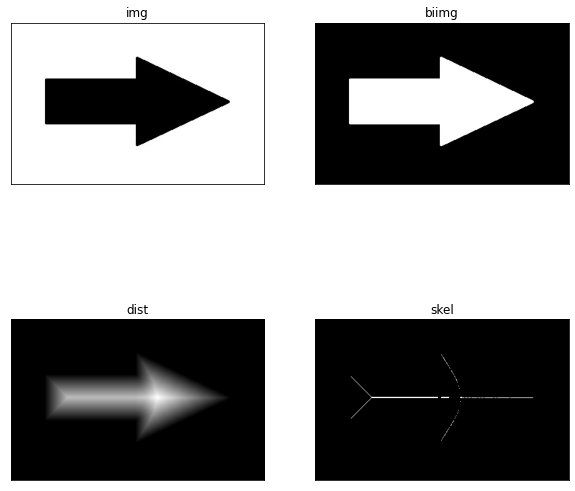

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지를 읽어서 바이너리 스케일로 변환
img = cv2.imread('./img/arrow.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)
_, biimg = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# 거리 변환 함수를 이용하여 거리 변환
dst = cv2.distanceTransform(biimg, cv2.DIST_L2, 5)
# 거리를 0 ~ 255로 정규화
dst = (dst/(dst.max()-dst.min()) * 255).astype(np.uint8)
# 거리 값에 쓰레시홀드로 완전한 뼈대 찾기
skeleton = cv2.adaptiveThreshold(dst, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                                 cv2.THRESH_BINARY, 7, -3)
print(skeleton.shape)
# 결과 출력
# cv2.imshow('origin', img)
# cv2.imshow('dist', dst)
# cv2.imshow('skel', skeleton)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
biimg = cv2.cvtColor(biimg, cv2.COLOR_GRAY2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB)
skeleton = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2RGB)

plt.figure(figsize = (10,10))
imgs = {'img':img, 'biimg':biimg, 'dist':dst, 'skel':skeleton}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v[:,::-1])
    plt.xticks([]),plt.yticks([])

위 결과가 차례로 나타내는 바는 다음과 같습니다.
- img : 원본 이미지입니다.
- biimg : 원본 이미지를 바이너리 스케일로 변환한 이미지입니다. 
- dist : 거리 변환 함수를 이용하여 거리 변환을 한 후 0 ~ 255로 정규화를 한 이미지입니다.
- skeleton : 경계로부터 가장 멀리 떨어져 있는 부분만 추출한 이미지입니다.

이렇게 위 과정을 통해 객체 영역의 뼈대를 추출하였습니다.

#### 3.2 연결 요소 레이블링

연결된 요소끼리 분리하는 방법 중 하나는 **레이블링** 방법이 있습니다. 이는 이미지에서 픽셀 값이 0으로 끊어지지 않는 부분끼리 같은 값을 부여해 분리를 할 수 있습니다.

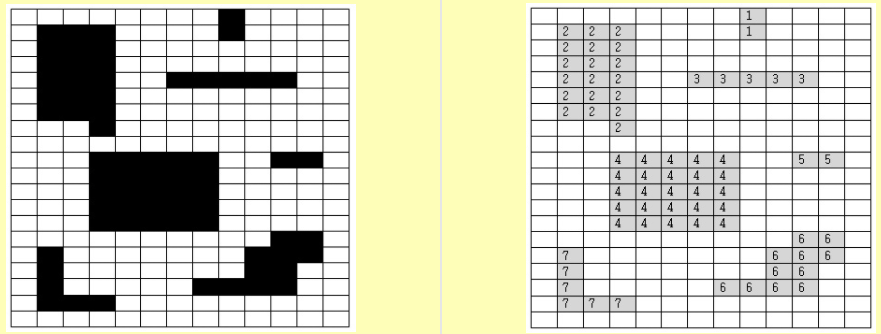
<center>출처 : https://velog.io/@5050/%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%A0%88%EC%9D%B4%EB%B8%94%EB%A7%81 </center>

**연결 요소 레이블링과 개수 반환**
- **retval, labels = cv2.connectedComponents(src, labels, connectivity=8, ltype)**

    - src: 입력 이미지, 바이너리 스케일
    - labels(optional): 레이블링된 입력 이미지와 같은 크기의 배열
    - connectivity(optional): 연결성을 검사할 방향 개수(4, 8 중 선택)
    - ltype(optional): 결과 레이블 배열 dtype
    - retval(optional): 레이블 개수

**레이블링된 각종 상태 정보 반환**
- **retval, labels, stats, centroids = cv2.connectedComponentsWithStats(src, labels, stats, centroids, connectivity, ltype)**
    - stats: N x 5 행렬 (N: 레이블 개수) [x좌표, y좌표, 폭, 높이, 너비]
    - centroids: 각 레이블의 중심점 좌표, N x 2 행렬 (N: 레이블 개수)

cv2.connectedComponents() 함수와 cv2.connectedComponentsWithStats() 함수 중 하나를 이용하여 레이블링을 하면 됩니다. 두 함수는 각종 추가 정보를 제공하는 것 말고는 동일합니다.

***1) 교재 예시***

5
(154, 421, 3)


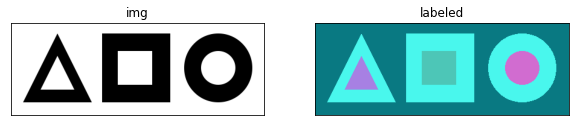

In [34]:
import cv2
import numpy as np

# 이미지 읽기
img = cv2.imread('./img/shapes_donut.png')
# 결과 이미지 생성
img2 = np.zeros_like(img)
# 그레이 스케일과 바이너리 스케일 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 연결된 요소 레이블링 적용
cnt, labels = cv2.connectedComponents(th)
#retval, labels, stats, cent = cv2.connectedComponentsWithStats(th)

print(cnt)
# 레이블 갯수 만큼 순회
for i in range(cnt):
    # 레이블이 같은 영역에 랜덤한 색상 적용
    img2[labels==i] =  [int(j) for j in np.random.randint(0,255, 3)]

# 결과 출력
# cv2.imshow('origin', img)
# cv2.imshow('labeled', img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

print(img2.shape)

plt.figure(figsize = (10,10))
imgs = {'img':img, 'labeled':img2}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,2,i+1)
    plt.title(k)
    plt.imshow(v)
    plt.xticks([]),plt.yticks([])

***2) 예시 이미지***

(256, 256, 3)
9
(256, 256, 3)


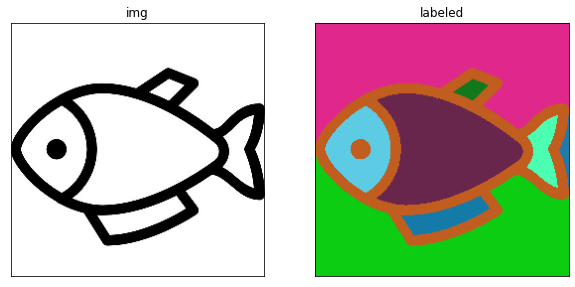

In [37]:
import cv2
import numpy as np

# 이미지 읽기
img = cv2.imread('./img/fish.jpg')
# 결과 이미지 생성
img2 = np.zeros_like(img)
# 그레이 스케일과 바이너리 스케일 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 연결된 요소 레이블링 적용
cnt, labels = cv2.connectedComponents(th)
#retval, labels, stats, cent = cv2.connectedComponentsWithStats(th)

print(cnt)
# 레이블 갯수 만큼 순회
for i in range(cnt):
    # 레이블이 같은 영역에 랜덤한 색상 적용
    img2[labels==i] =  [int(j) for j in np.random.randint(0,255, 3)]

# 결과 출력
# cv2.imshow('origin', img)
# cv2.imshow('labeled', img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

print(img2.shape)

plt.figure(figsize = (10,10))
imgs = {'img':img, 'labeled':img2}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,2,i+1)
    plt.title(k)
    plt.imshow(v)
    plt.xticks([]),plt.yticks([])

#### 3.3 색 채우기

위 단원에서는 '채우기' 기능을 이용하여 색상을 칠하는 작업을 해볼 것입니다.

- **retval, img, mask, rect = cv2.floodFill(img, mask, seed, newVal, loDiff, upDiff, flags)**
    - img: 입력 이미지, 1 또는 3채널
    - mask: 입력 이미지보다 2 x 2 픽셀이 더 큰 배열, 0이 아닌 영역을 만나면 채우기 중지
    - seed: 채우기 시작할 좌표
    - newVal: 채우기에 사용할 색상 값
    - loDiff, upDiff(optional): 채우기 진행을 결정할 최소/최대 차이 값
    - flags(optional): 채우기 방식 선택
        - cv2.FLOODFILL_MASK_ONLY: img가 아닌 mask에만 채우기 적용
        - cv2.FLOODFILL_FIXED_RANGE: 이웃 픽셀이 아닌 seed 픽셀과 비교)
    - retval: 채우기 한 픽셀의 개수
    - rect: 채우기가 이루어진 영역을 감싸는 사각형
    
    
이 함수는 img의 seed 좌표에서 시작하여 newVal으 값으로 채우기를 시작합니다. 이때, 이웃하는 픽셀에 채우기를 계속 하려면 현재 픽셀이 이웃 픽셀의 IoDifff를 뺀 값보다 크건 같고 upDiff를 더한 값보다는 작거나 같아야 합니다.(생략시 SEED와 같은 값을 가지는 이웃 픽셀만 채우기 진행)

***1) 교재 예시***

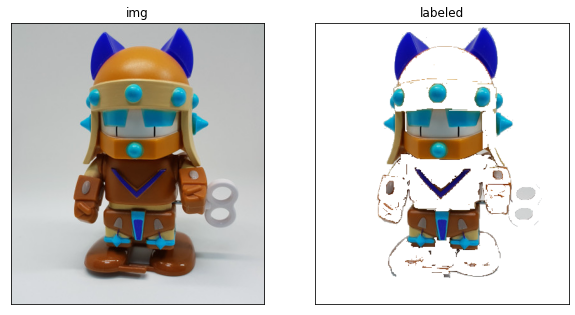

In [39]:
import cv2
import numpy as np

img = cv2.imread('./img/taekwonv1.jpg')
img2 = img.copy()
rows, cols = img2.shape[:2]
# 마스크 생성, 원래 이미지 보다 2픽셀 크게 
mask = np.zeros((rows+2, cols+2), np.uint8)
# 채우기에 사용할 색 
newVal = (255,255,255)
# 최소 최대 차이 값
loDiff, upDiff = (10,10,10), (10,10,10)

# 마우스 이벤트 처리 함수
def onMouse(event, x, y, flags, param):
    global mask, img2
    if event == cv2.EVENT_LBUTTONDOWN:
        seed = (x,y)
        # 색 채우기 적용 
        retval = cv2.floodFill(img2, mask, seed, newVal, loDiff, upDiff)
        # 채우기 변경 결과 표시
        cv2.imshow('img', img2)

# 화면 출력
cv2.imshow('img', img2)
cv2.setMouseCallback('img', onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()


plt.figure(figsize = (10,10))
imgs = {'img':img, 'labeled':img2}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,2,i+1)
    plt.title(k)
    plt.imshow(v[:,::-1])
    plt.xticks([]),plt.yticks([])

setMouseCallback 함수를 이용하여 특정 영역을 클릭하면 흰색으로 채우는 코드를 완성하였습니다.

***2) 예시 이미지***

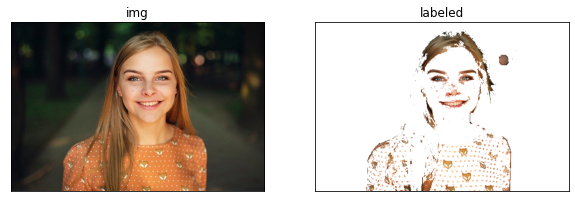

In [41]:
import cv2
import numpy as np

img = cv2.imread('./img/woman.jpg')
img2 = img.copy()
rows, cols = img2.shape[:2]
# 마스크 생성, 원래 이미지 보다 2픽셀 크게 
mask = np.zeros((rows+2, cols+2), np.uint8)
# 채우기에 사용할 색 
newVal = (255,255,255)
# 최소 최대 차이 값
loDiff, upDiff = (10,10,10), (10,10,10)

# 마우스 이벤트 처리 함수
def onMouse(event, x, y, flags, param):
    global mask, img2
    if event == cv2.EVENT_LBUTTONDOWN:
        seed = (x,y)
        # 색 채우기 적용 
        retval = cv2.floodFill(img2, mask, seed, newVal, loDiff, upDiff)
        # 채우기 변경 결과 표시
        cv2.imshow('img', img2)

# 화면 출력
cv2.imshow('img', img2)
cv2.setMouseCallback('img', onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()


plt.figure(figsize = (10,10))
imgs = {'img':img, 'labeled':img2}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,2,i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]),plt.yticks([])

예시 이미지는 선이 뚜렷하지 않아서 분리가 잘 되지는 않은 모습을 볼 수 있습니다.

#### 3.4 워터셰드

**워터셰드(Watershed)**는 강물이 한 줄기로 흐르다가 갈라지는 경계인 분수령을 의미합니다. 영상처리에서는 경계를 찾는 방법 중 하나로 픽셀 값의 크기를 산과 골짜기 같은 높고 낮은 지형으로 보고 물을 채워서 그 물이 만나는 곳을 경계로 찾는 방식입니다. 앞서 살펴본 색 채우기와 비슷한 방식으로 연속된 영역을 찾는것이라고 볼 수 있지만, seed가 하나가 아닌 여러개를 지정할 수 있고 이런 seed를 marker라고 합니다.

- **markers = cv2.watershed(img, markers)**
    - img: 입력 이미지
    - markers: 마커, 입력 이미지와 크기가 같은 1차원 배열(int32)
    
    
이때 markers는 입력 이미지와 행과 열 크기가 같은 1차원 배열로 전달해야 합니다. 또한 markers의 값은 경계를 찾고자 하는 픽셀 영역은 0을 갖게 하고 연결된 영역이 확실한 픽셀에 대해선 동일한 양의 정수를 값으로 갖게 합니다.

**진행 순서 :**<br>
1) 0으로 채워진 marker 생성<br>
2) 마우스가 움직이면 움직인 영상의 좌표에 해당하는 marker 좌표에 현재의 marker 아이디를 채움(선 그린 곳 -> 1 또는 2) <br>
3) 하나의 선 그리기를 끝냈으면 다음 marker를 위해 아이디 증가 <br>
4) 다 끝나고 오른쪽 마우스를 누르면 워터셰드 실행 <br>
- marker는 1로 채워진 marker 공간이 워터셰드로 분리될 때까지 1로 채우는 식으로 연결된 공간의 marker값을 같게 하고 경계에 해당하는 영역만 -1로 채움<br>

5) -1로 채워진 marker와 같은 좌표의 영상 픽셀을 초록색으로 변환<br>
6) 미리 저장해둔 marker 아이디와 marker를 선택할 때 픽셀값을 이용하여 같은 marker 아이디 값을 가진 영역을 같은 색으로 채움<br>

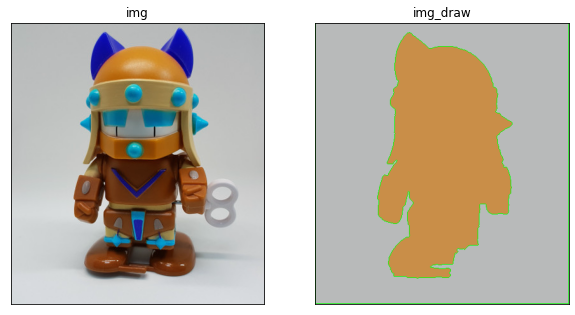

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/taekwonv1.jpg')
rows, cols = img.shape[:2]
img_draw = img.copy()

# 마커 생성, 모든 요소는 0으로 초기화 
marker = np.zeros((rows, cols), np.int32)
markerId = 1        # 마커 아이디, 1에서 시작
colors = []         # 마커 선택한 영역 색상 저장할 공간
isDragging = False  # 드래그 여부 확인 변수

# 마우스 이벤트 처리 함수
def onMouse(event, x, y, flags, param):
    global img_draw, marker, markerId, isDragging
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 마우스 버튼 다운, 드래그 시작 
        isDragging = True
        # 각 마커의 아이디와 현 위치의 색상 값을 쌍으로 매핑해서 저장 
        colors.append((markerId, img[y,x]))
    elif event == cv2.EVENT_MOUSEMOVE:  # 마우스 움직임
        if isDragging:                  # 드래그 진행 중
            # 마우스 좌표에 해당하는 마커의 좌표에 동일한 마커 아이디로 채워 넣기
            marker[y,x] = markerId
            # 마커 표시한 곳을 빨강색점으로 표시해서 출력
            cv2.circle(img_draw, (x,y), 3, (0,0,255), -1)
            cv2.imshow('watershed', img_draw)
    elif event == cv2.EVENT_LBUTTONUP:  # 왼쪽 마우스 버튼 업
        if isDragging:                  
            isDragging = False          # 드래그 중지
            # 다음 마커 선택을 위해 마커 아이디 증가
            markerId +=1
    elif event == cv2.EVENT_RBUTTONDOWN: # 오른쪽 마우스 버튼 누름
            # 모아 놓은 마커를 이용해서 워터 쉐드 적용
            cv2.watershed(img, marker)
            # 마커에 -1로 표시된 경계를 초록색으로 표시
            img_draw[marker == -1] = (0,255,0)
            for mid, color in colors: # 선택한 마커 아이디 갯수 만큼 반복
                # 같은 마커 아이디 값을 갖는 영역을 마커 선택한 색상으로 채우기 
                img_draw[marker==mid] = color
            cv2.imshow('watershed', img_draw) # 표시한 결과 출력

# 화면 출력
cv2.imshow('watershed', img)
cv2.setMouseCallback('watershed', onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize = (10,10))
imgs = {'img':img, 'img_draw':img_draw}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,2,i+1)
    plt.title(k)
    plt.imshow(v[:,::-1])
    plt.xticks([]),plt.yticks([])

객체와 배경이 잘 분리된 것을 확인할 수 있습니다.

#### 3.5 그랩컷

**그랩컷(Graph Cut)**은 그래프 컷을 기반으로 하는 알고리즘을 확장한 것입니다. 사용자가 객체로 분리할 부분에 사각형 표시를 해주면 객체와 배경의 색상 분포를 추정하여 동일한 레이블을 가진 연결된 영역에서 객체와 배경을 분리합니다.

- **mask, bgdModel, fgdModel = cv2.grabCut(img, mask, rect, bgdModel, fgdModel, iterCount, mode)**
    - img: 입력 이미지
    - mask: 입력 이미지와 크기가 같은 1 채널 배열, 배경과 전경을 구분하는 값을 저장 
        - cv2.GC_BGD: 확실한 배경(0)
        - cv2.GC_FGD: 확실한 전경(1)
        - cv2.GC_PR_BGD: 아마도 배경(2)
        - cv2.GC_PR_FGD: 아마도 전경(3)
        - rect: 전경이 있을 것으로 추측되는 영역의 사각형 좌표, 튜플 (x1, y1, x2, y2)
    - bgdModel, fgdModel: 함수 내에서 사용할 임시 배열 버퍼 (재사용할 경우 수정하지 말 것)
    - iterCount: 반복 횟수
    - mode(optional): 동작 방법 
        - cv2.GC_INIT_WITH_RECT: rect에 지정한 좌표를 기준으로 그랩컷 수행
        - cv2.GC_INIT_WITH_MASK: mask에 지정한 값을 기준으로 그랩컷 수행
        - cv2.GC_EVAL: 재시도
        
        
        
 mode에 cv2.GC_INIT_WITH_RECT를 전달하면 세 번째 파라미터인 rect에 전달한 사각형 좌표를 이용해 객체와 배경을 분리합니다. 그 결과를 mask에 할당하여 반환합니다. mask에 할당받은 값이 0과 1이면 확실한 배경, 객체를 의미하고 2와 3이면 아마도 배경, 전경을 의미합니다. 1차적으로 구분한 후 mode에 cv2.GC_INIT_WITH_MASK를 지정하여 다시 호출하면 조금 더 정확한 mask를 얻을 수 있습니다.

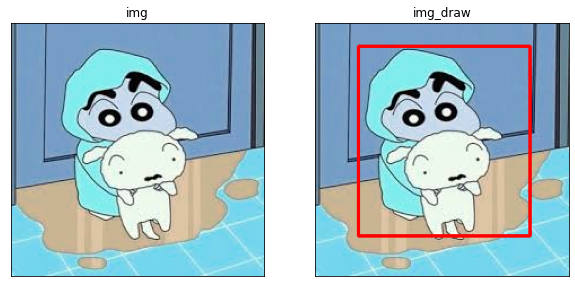

In [5]:
import cv2
import numpy as np

img = cv2.imread('./img/jjang4.jpg')
img_draw = img.copy()
mask = np.zeros(img.shape[:2], dtype=np.uint8)  # 마스크 생성
rect = [0,0,0,0]    # 사각형 영역 좌표 초기화
mode = cv2.GC_EVAL  # 그랩컷 초기 모드
# 배경 및 전경 모델 버퍼
bgdmodel = np.zeros((1,65),np.float64)
fgdmodel = np.zeros((1,65),np.float64)

# 마우스 이벤트 처리 함수
def onMouse(event, x, y, flags, param):
    global mouse_mode, rect, mask, mode
    if event == cv2.EVENT_LBUTTONDOWN : # 왼쪽 마우스 누름
        if flags <= 1: # 아무 키도 안 눌렀으면
            mode = cv2.GC_INIT_WITH_RECT # 드래그 시작, 사각형 모드 
            rect[:2] = x, y # 시작 좌표 저장
    # 마우스가 움직이고 왼쪽 버튼이 눌러진 상태
    elif event == cv2.EVENT_MOUSEMOVE and flags & cv2.EVENT_FLAG_LBUTTON :
        if mode == cv2.GC_INIT_WITH_RECT: # 드래그 진행 중 
            img_temp = img.copy()
            # 드래그 사각형 화면에 표시
            cv2.rectangle(img_temp, (rect[0], rect[1]), (x, y), (0,255,0), 2)
            cv2.imshow('img', img_temp)
        elif flags > 1: # 키가 눌러진 상태
            mode = cv2.GC_INIT_WITH_MASK    # 마스크 모드 
            if flags & cv2.EVENT_FLAG_CTRLKEY :# 컨트롤 키, 분명한 전경
                # 흰색 점 화면에 표시
                cv2.circle(img_draw,(x,y),3, (255,255,255),-1)
                # 마스크에 GC_FGD로 채우기      
                cv2.circle(mask,(x,y),3, cv2.GC_FGD,-1)
            if flags & cv2.EVENT_FLAG_SHIFTKEY : # 쉬프트키, 분명한 배경
                # 검정색 점 화면에 표시
                cv2.circle(img_draw,(x,y),3, (0,0,0),-1)
                # 마스크에 GC_BGD로 채우기      
                cv2.circle(mask,(x,y),3, cv2.GC_BGD,-1)
            cv2.imshow('img', img_draw) # 그려진 모습 화면에 출력
    elif event == cv2.EVENT_LBUTTONUP: # 마우스 왼쪽 버튼 뗀 상태
        if mode == cv2.GC_INIT_WITH_RECT : # 사각형 그리기 종료
            rect[2:] =x, y # 사각형 마지막 좌표 수집
            # 사각형 그려서 화면에 출력 
            cv2.rectangle(img_draw, (rect[0], rect[1]), (x, y), (255,0,0), 2)
            cv2.imshow('img', img_draw)
        # 그랩컷 적용 
        cv2.grabCut(img, mask, tuple(rect), bgdmodel, fgdmodel, 1, mode)
        img2 = img.copy()
        # 마스크에 확실한 배경, 아마도 배경으로 표시된 영역을 0으로 채우기
        img2[(mask==cv2.GC_BGD) | (mask==cv2.GC_PR_BGD)] = 0
        cv2.imshow('grabcut', img2) # 최종 결과 출력
        mode = cv2.GC_EVAL # 그랩컷 모드 리셋
# 초기 화면 출력 및 마우스 이벤트 등록
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse)
while True:    
    if cv2.waitKey(0) & 0xFF == 27 : # esc
        break
cv2.destroyAllWindows()

plt.figure(figsize = (10,10))
imgs = {'img':img, 'img_draw':img_draw}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,2,i+1)
    plt.title(k)
    plt.imshow(v[:,::-1])
    plt.xticks([]),plt.yticks([])

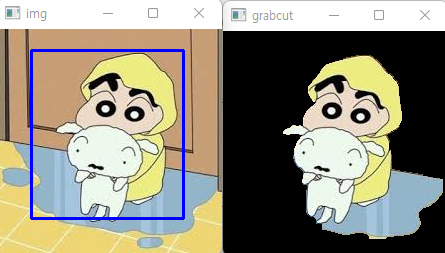

마우스 사용
- 객체 영역을 드래그 해서 사각형 그리기
- 미처 지우지 못한 배경에 지우고 싶은 부분에 검은색 선으로 그리기
- 잘못 지워진 부분은 흰색 선으로 그리기

#### 3.6 평균 이동 필터

평균 이동 필터를 활용하면 물감으로 그림을 그린 것과 같이 이미지를 바꿀 수 있습니다.

- **dst = cv2.pyrMeanShiftFiltering(src, sp, sr, dst, maxLevel, termcrit)**
    - src: 입력 이미지
    - sp: 공간 윈도 반지름 크기
    - sr: 색상 윈도 반지름 크기
    - maxLevel(optional): 이미지 피라미드 최대 레벨
    - termcrit(optional): 반복 중지 요건 
        - cv2.TERM_CRITERIA_EPS: 정확도가 최소 정확도(epsilon) 보다 작아지면 중지
        - cv2.TERM_CRITERIA_MAX_ITER: 최대 반복 횟수(max_iter)에 도달하면 중지
     default epsilon=1, max_iter=5
     
     
[이미지 피라미드](https://dacon.io/codeshare/4898?page=1&dtype=recent)를 이용하여 시작을 합니다. 이미지 피라미드는 영상의 크기를 단계적으로 축소 or 확대하여 피라미드처럼 쌓아 놓는 것을 의미합니다.

위 함수는 이미지 피라미드를 내부적으로 만들어 작은 이미지의 평균 이동 결과를 큰 이미지에 적용합니다. 

In [42]:
import cv2
import numpy as np

img = cv2.imread('./img/jjang.jpg')
# 트랙바 이벤트 처리 함수
def onChange(x):
    #sp, sr, level 선택 값 수집
    sp = cv2.getTrackbarPos('sp', 'img')
    sr = cv2.getTrackbarPos('sr', 'img')
    lv = cv2.getTrackbarPos('lv', 'img')

    # 평균 이동 필터 적용 
    mean = cv2.pyrMeanShiftFiltering(img, sp, sr, None, lv)
    # 변환 이미지 출력
    cv2.imshow('img', np.hstack((img, mean)))

# 초기 화면 출력
cv2.imshow('img', np.hstack((img, img)))
# 트랙바 이벤트 함수 연결
cv2.createTrackbar('sp', 'img', 0,100, onChange)
cv2.createTrackbar('sr', 'img', 0,100, onChange)
cv2.createTrackbar('lv', 'img', 0,5, onChange)
cv2.waitKey(0)
cv2.destroyAllWindows()

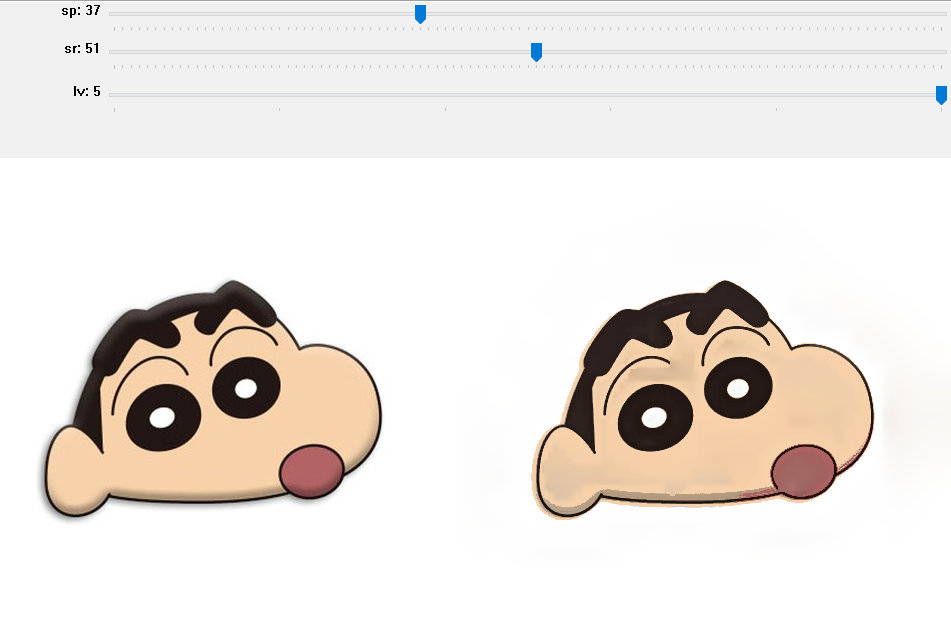

- 딥러닝 안써도 잘된다 마무리 멘트